# Client code for Heston and Bates calibration using MCMC

## 1. Heston calibration

The script below runs the calibration procedure for the parameters of the Heston model driving the dynamics of a stock 

$$dS_t = \mu S_t dt + \sqrt{V_t} S_t dW^{S}_t$$

with stochastic variance

$$dV_t = \kappa (\theta - V_t) dt + \sigma_V \sqrt{V_t} dW^{V}_t$$

and correlation between the driving Wiener processes $W^{S}_t$ and $W^{V}_t$

$$dW^{S}_t dW^{V}_t = \rho dt$$

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf

sns.set(palette='viridis')
warnings.filterwarnings("ignore")

from heston_calibrator import HestonCalibrator

In [22]:
'''Paramter setting for various strike prices for AAPL'''
# ----- load data
appl = yf.Ticker("AAPL")
hist = appl.history(start="2021-03-01", end="2023-01-01", interval="1d")
stock_data = hist['Close'].values

# ----- set parameters
s0 = 182
nsteps = len(stock_data)
nsim = 500
r = 0.05
q = 0.04
T = 1

In [28]:
# ================================== Heston calibration====================================
K = [175,180,185,190]
iterations = 20
option_prices = np.zeros((len(K),iterations))
for i in range(len(K)):
    print(f"########### Strike {K[i]} ##########")
    for j in range(iterations):
        print(f"---------- Iteration {j+1} ----------")
        # ----- calibrate parameters
        n_mcmc_steps = 10000
        burn_in = 5000
        heston_cal = HestonCalibrator(price_series=stock_data, cost_of_carry=r - q)

        start = time.time()
        heston_cal.calibrate(n_mcmc_steps=n_mcmc_steps, burn_in=burn_in)
        finish = time.time()
        #print(f"{(finish-start)/60} minutes elapsed")

        # ----- get the calibrated parameters
        all_params = heston_cal.params_dict
        mu = all_params.get("mu_final")
        kappa = all_params.get("kappa_final")
        theta = all_params.get("theta_final")
        sigma = all_params.get("volvol_final")
        rho = all_params.get("rho_final")

        # ----- get stock and variance trajectories
        simulated_paths, simulated_variances = heston_cal.get_paths(T=T, s0=s0, nsteps=nsteps, nsim=nsim, risk_neutral=True)

        # ----- calculate european call option price
        average_price = np.mean(simulated_paths, axis=0)
        euro_call_payoff = np.maximum(simulated_paths[:,-1]-K[i], 0)
        average_payoff = np.mean(euro_call_payoff)
        price = np.exp(-r*2)*average_payoff
        print(f"Price: {price}")
        option_prices[i,j] = price
    print(f"Average Price: {np.mean(option_prices[i,:])}")
    print()


########### Strike 175 ##########
---------- Iteration 1 ----------


100%|██████████| 9999/9999 [02:13<00:00, 74.84it/s]


Price: 38.040079157553556
---------- Iteration 2 ----------


100%|██████████| 9999/9999 [02:17<00:00, 72.84it/s]


Price: 41.7125958669459
---------- Iteration 3 ----------


100%|██████████| 9999/9999 [02:18<00:00, 72.17it/s]


Price: 40.36901866446197
---------- Iteration 4 ----------


100%|██████████| 9999/9999 [02:15<00:00, 73.61it/s]


Price: 45.16249602391291
---------- Iteration 5 ----------


100%|██████████| 9999/9999 [02:14<00:00, 74.49it/s]


Price: 38.5818335469767
---------- Iteration 6 ----------


100%|██████████| 9999/9999 [02:13<00:00, 74.89it/s]


Price: 44.179061637972715
---------- Iteration 7 ----------


100%|██████████| 9999/9999 [02:13<00:00, 74.92it/s]


Price: 38.52744859792574
---------- Iteration 8 ----------


100%|██████████| 9999/9999 [02:13<00:00, 75.11it/s]


Price: 39.99362649038046
---------- Iteration 9 ----------


100%|██████████| 9999/9999 [02:13<00:00, 75.13it/s]


Price: 38.27325290271182
---------- Iteration 10 ----------


100%|██████████| 9999/9999 [09:28<00:00, 17.60it/s]  


Price: 56.10803665552199
---------- Iteration 11 ----------


100%|██████████| 9999/9999 [03:35<00:00, 46.36it/s]  


Price: 45.20879515187952
---------- Iteration 12 ----------


100%|██████████| 9999/9999 [02:13<00:00, 74.96it/s]


Price: 36.45891050999475
---------- Iteration 13 ----------


100%|██████████| 9999/9999 [02:15<00:00, 73.68it/s]


Price: 40.662922526434
---------- Iteration 14 ----------


100%|██████████| 9999/9999 [02:27<00:00, 67.66it/s]


Price: 41.638791957033014
---------- Iteration 15 ----------


100%|██████████| 9999/9999 [02:14<00:00, 74.24it/s]


Price: 34.373654545704845
---------- Iteration 16 ----------


100%|██████████| 9999/9999 [02:13<00:00, 75.03it/s]


Price: 38.12833029186105
---------- Iteration 17 ----------


100%|██████████| 9999/9999 [04:16<00:00, 38.98it/s]  


Price: 39.598860634814855
---------- Iteration 18 ----------


100%|██████████| 9999/9999 [02:14<00:00, 74.32it/s]


Price: 38.94749485054506
---------- Iteration 19 ----------


100%|██████████| 9999/9999 [02:13<00:00, 74.70it/s]


Price: 37.979407187922014
---------- Iteration 20 ----------


100%|██████████| 9999/9999 [02:15<00:00, 73.70it/s]


Price: 41.136668835328074
Average Price: 40.754064301794045

########### Strike 180 ##########
---------- Iteration 1 ----------


100%|██████████| 9999/9999 [02:13<00:00, 74.67it/s]


Price: 32.941253913952266
---------- Iteration 2 ----------


100%|██████████| 9999/9999 [02:15<00:00, 74.01it/s]


Price: 41.70265624309882
---------- Iteration 3 ----------


100%|██████████| 9999/9999 [02:15<00:00, 73.99it/s]


Price: 40.11938498773579
---------- Iteration 4 ----------


100%|██████████| 9999/9999 [02:21<00:00, 70.72it/s]


Price: 40.68906868628754
---------- Iteration 5 ----------


100%|██████████| 9999/9999 [02:19<00:00, 71.64it/s]


Price: 30.6332256401112
---------- Iteration 6 ----------


100%|██████████| 9999/9999 [02:18<00:00, 72.44it/s]


Price: 44.253890155699324
---------- Iteration 7 ----------


100%|██████████| 9999/9999 [02:18<00:00, 72.38it/s]


Price: 28.38900020238372
---------- Iteration 8 ----------


100%|██████████| 9999/9999 [02:16<00:00, 73.21it/s]


Price: 30.274780063649033
---------- Iteration 9 ----------


100%|██████████| 9999/9999 [02:15<00:00, 73.74it/s]


Price: 44.18608184501105
---------- Iteration 10 ----------


100%|██████████| 9999/9999 [02:17<00:00, 72.91it/s]


Price: 36.91074195928444
---------- Iteration 11 ----------


100%|██████████| 9999/9999 [02:16<00:00, 73.49it/s]


Price: 36.590147498587925
---------- Iteration 12 ----------


100%|██████████| 9999/9999 [02:15<00:00, 73.81it/s]


Price: 40.18459872981055
---------- Iteration 13 ----------


100%|██████████| 9999/9999 [02:13<00:00, 74.65it/s]


Price: 29.985091029319367
---------- Iteration 14 ----------


100%|██████████| 9999/9999 [02:14<00:00, 74.27it/s]


Price: 38.988048097516526
---------- Iteration 15 ----------


100%|██████████| 9999/9999 [02:13<00:00, 75.08it/s]


Price: 26.088605417565493
---------- Iteration 16 ----------


100%|██████████| 9999/9999 [12:53<00:00, 12.93it/s]   


Price: 35.483171420617296
---------- Iteration 17 ----------


100%|██████████| 9999/9999 [02:14<00:00, 74.09it/s]


Price: 39.05329953265981
---------- Iteration 18 ----------


100%|██████████| 9999/9999 [02:15<00:00, 74.04it/s]


Price: 37.843321937068595
---------- Iteration 19 ----------


100%|██████████| 9999/9999 [02:14<00:00, 74.18it/s]


Price: 37.24947668694463
---------- Iteration 20 ----------


100%|██████████| 9999/9999 [02:15<00:00, 74.05it/s]


Price: 30.762372506815602
Average Price: 36.11641082770595

########### Strike 185 ##########
---------- Iteration 1 ----------


100%|██████████| 9999/9999 [02:14<00:00, 74.43it/s]


Price: 36.943623327737825
---------- Iteration 2 ----------


100%|██████████| 9999/9999 [02:14<00:00, 74.56it/s]


Price: 26.764620251455135
---------- Iteration 3 ----------


100%|██████████| 9999/9999 [02:12<00:00, 75.23it/s]


Price: 41.846458102626215
---------- Iteration 4 ----------


100%|██████████| 9999/9999 [06:35<00:00, 25.31it/s]  


Price: 38.16002299173637
---------- Iteration 5 ----------


100%|██████████| 9999/9999 [01:17<00:00, 128.99it/s]


Price: 34.56922255322171
---------- Iteration 6 ----------


100%|██████████| 9999/9999 [01:17<00:00, 129.09it/s]


Price: 30.443550841672266
---------- Iteration 7 ----------


100%|██████████| 9999/9999 [01:17<00:00, 128.94it/s]


Price: 45.38695229706569
---------- Iteration 8 ----------


100%|██████████| 9999/9999 [32:30<00:00,  5.13it/s]   


Price: 28.066685349810168
---------- Iteration 9 ----------


100%|██████████| 9999/9999 [01:16<00:00, 130.51it/s]


Price: 39.89299193334572
---------- Iteration 10 ----------


100%|██████████| 9999/9999 [01:18<00:00, 126.64it/s]


Price: 39.13094130393555
---------- Iteration 11 ----------


100%|██████████| 9999/9999 [01:19<00:00, 126.18it/s]


Price: 38.117439790322955
---------- Iteration 12 ----------


100%|██████████| 9999/9999 [01:21<00:00, 123.04it/s]


Price: 26.83145912048961
---------- Iteration 13 ----------


100%|██████████| 9999/9999 [01:20<00:00, 123.45it/s]


Price: 40.52870463630003
---------- Iteration 14 ----------


100%|██████████| 9999/9999 [01:20<00:00, 123.51it/s]


Price: 29.60135171910177
---------- Iteration 15 ----------


100%|██████████| 9999/9999 [01:21<00:00, 123.36it/s]


Price: 30.140889617756297
---------- Iteration 16 ----------


100%|██████████| 9999/9999 [01:21<00:00, 123.25it/s]


Price: 32.916611408939886
---------- Iteration 17 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.99it/s]


Price: 35.311004256789445
---------- Iteration 18 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.84it/s]


Price: 42.049785289591426
---------- Iteration 19 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.66it/s]


Price: 40.382491629850854
---------- Iteration 20 ----------


100%|██████████| 9999/9999 [01:21<00:00, 123.02it/s]


Price: 42.41620043155447
Average Price: 35.97505034266517

########### Strike 190 ##########
---------- Iteration 1 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.84it/s]


Price: 37.10060698686785
---------- Iteration 2 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.27it/s]


Price: 29.487413780424305
---------- Iteration 3 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.72it/s]


Price: 33.09378845237673
---------- Iteration 4 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.75it/s]


Price: 33.774929731308234
---------- Iteration 5 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.49it/s]


Price: 34.0323604639301
---------- Iteration 6 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.38it/s]


Price: 30.621480324540055
---------- Iteration 7 ----------


100%|██████████| 9999/9999 [01:22<00:00, 121.84it/s]


Price: 38.549616438458415
---------- Iteration 8 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.66it/s]


Price: 35.13909118255924
---------- Iteration 9 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.57it/s]


Price: 36.62474957332953
---------- Iteration 10 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.36it/s]


Price: 28.551874240612587
---------- Iteration 11 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.62it/s]


Price: 30.12366524120755
---------- Iteration 12 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.90it/s]


Price: 35.95825314714339
---------- Iteration 13 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.62it/s]


Price: 31.26302299622306
---------- Iteration 14 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.73it/s]


Price: 38.58650231289609
---------- Iteration 15 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.79it/s]


Price: 36.804368584573254
---------- Iteration 16 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.88it/s]


Price: 33.06661500054896
---------- Iteration 17 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.70it/s]


Price: 31.848860050329918
---------- Iteration 18 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.72it/s]


Price: 30.637136221571765
---------- Iteration 19 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.64it/s]


Price: 33.050337343966326
---------- Iteration 20 ----------


100%|██████████| 9999/9999 [01:21<00:00, 122.53it/s]


Price: 38.016178491410585
Average Price: 33.816542528213894



Average Price Call with Strike 175: 40.754064301794045
Estimated vs. Actual Price: 3.0540643017940425
Average Price Call with Strike 180: 36.11641082770595
Estimated vs. Actual Price: 1.4864108277059458
Average Price Call with Strike 185: 35.97505034266517
Estimated vs. Actual Price: 3.825050342665172
Average Price Call with Strike 190: 33.816542528213894
Estimated vs. Actual Price: 4.466542528213893


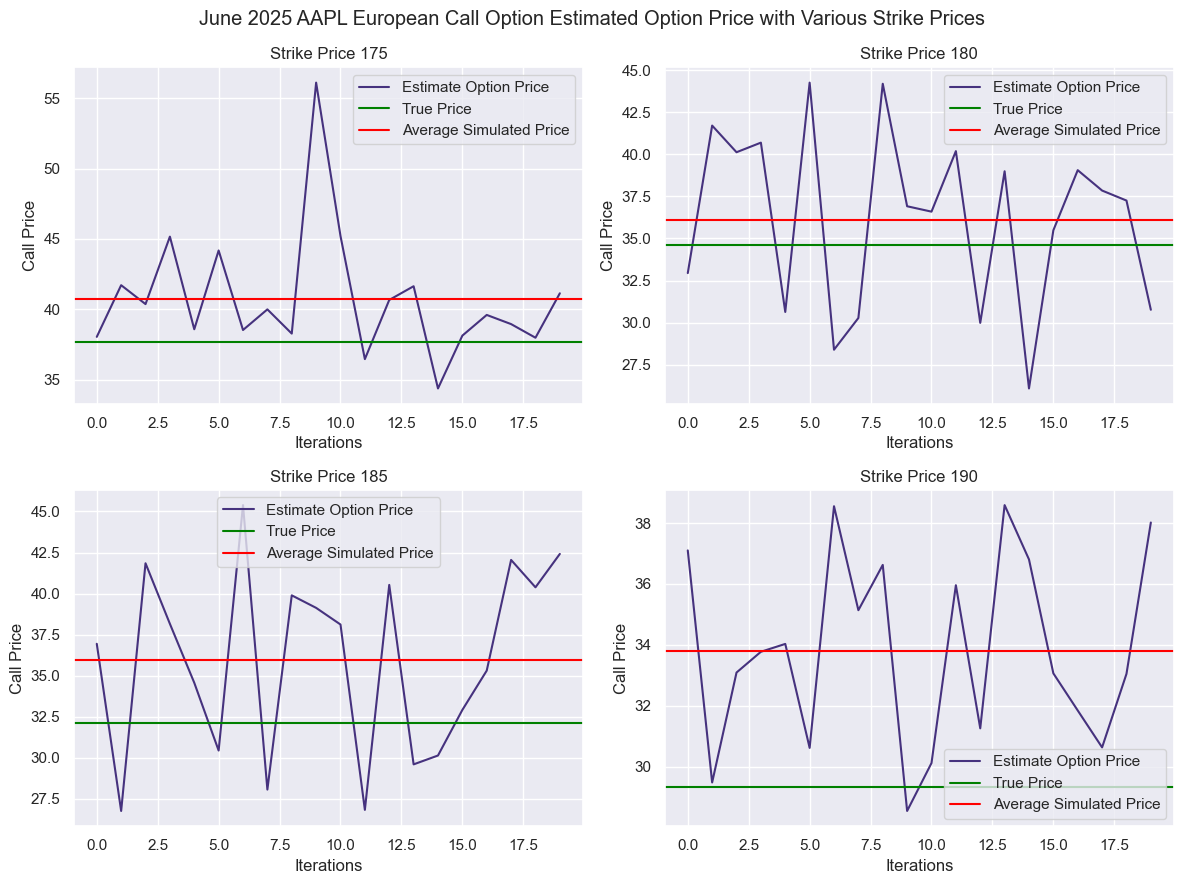

In [29]:
# ----- Estimate value of June 2025 AAPL European Call Option Price
call_price = np.mean(option_prices, axis = 1)
true_price = [37.7, 34.63, 32.15, 29.35]
for i in range(len(K)):
    print(f"Average Price Call with Strike {K[i]}: {call_price[i]}")
    print(f"Estimated vs. Actual Price: {np.abs(call_price[i]-true_price[i])}")

# ----- plot estimated prices vs. real price for AAPL June 2025 European Call Option
fig, ax = plt.subplots(2,2, figsize=(12, 9))

ax[0,0].set_xlabel('Iterations')
ax[0,0].set_ylabel('Call Price')
ax[0,0].plot(option_prices[0,:], label="Estimate Option Price")
ax[0,0].axhline(y = true_price[0], label="True Price", color='g')
ax[0,0].axhline(y = call_price[0], label="Average Simulated Price", color='r')
ax[0,0].set_title(f"Strike Price {K[0]}")
ax[0,0].legend()

ax[0,1].set_xlabel('Iterations')
ax[0,1].set_ylabel('Call Price')
ax[0,1].plot(option_prices[1,:], label="Estimate Option Price")
ax[0,1].axhline(y = true_price[1], label="True Price", color='g')
ax[0,1].axhline(y = call_price[1], label="Average Simulated Price", color='r')
ax[0,1].set_title(f"Strike Price {K[1]}")
ax[0,1].legend()

ax[1,0].set_xlabel('Iterations')
ax[1,0].set_ylabel('Call Price')
ax[1,0].plot(option_prices[2,:], label="Estimate Option Price")
ax[1,0].axhline(y = true_price[2], label="True Price", color='g')
ax[1,0].axhline(y = call_price[2], label="Average Simulated Price", color='r')
ax[1,0].set_title(f"Strike Price {K[2]}")
ax[1,0].legend()

ax[1,1].set_xlabel('Iterations')
ax[1,1].set_ylabel('Call Price')
ax[1,1].plot(option_prices[3,:], label="Estimate Option Price")
ax[1,1].axhline(y = true_price[3], label="True Price", color='g')
ax[1,1].axhline(y = call_price[3], label="Average Simulated Price", color='r')
ax[1,1].set_title(f"Strike Price {K[3]}")
ax[1,1].legend()


fig.suptitle(f"June 2025 AAPL European Call Option Estimated Option Price with Various Strike Prices")
fig.subplots_adjust(wspace=None, hspace=0.3)
fig.tight_layout()

In [4]:
'''Paramter setting for state variable and parameter estimation'''
# ----- load data
appl = yf.Ticker("^GSPC")
hist = appl.history(start="2020-01-01", end="2022-12-31", interval="1d")
stock_data = hist['Close'].values
print(stock_data[0])
print(stock_data[-1])

# ----- set parameters
s0 = stock_data[0]
nsteps = len(stock_data)
nsim = 500
r = 0.7
q = 0.0
T = 1

3257.85009765625
3839.5


In [5]:
mu_holder = []
theta_holder = []
for i in range(40):
    print(f"-------- Iteration {i+1} ---------")
    # ----- calibrate parameters
    n_mcmc_steps = 50000
    burn_in = 5000
    heston_cal = HestonCalibrator(price_series=stock_data, cost_of_carry=r - q)

    start = time.time()
    heston_cal.calibrate(n_mcmc_steps=n_mcmc_steps, burn_in=burn_in)
    finish = time.time()
    print(f"{(finish-start)/60} minutes elapsed")

    # ----- get the calibrated parameters
    all_params = heston_cal.params_dict
    mu = all_params.get("mu_final")
    kappa = all_params.get("kappa_final")
    theta = all_params.get("theta_final")
    sigma = all_params.get("volvol_final")
    rho = all_params.get("rho_final")

    # ----- get parameter estimates
    print(f"Theta: {theta}")
    print(f"Mu Daily: {mu}")
    print(f"Mu Annual: {((1+mu)**252) - 1}")
    print(f"Kappa: {kappa}")
    print(f"Sigma: {sigma}")
    print(f"Rho: {rho}")
    print()
    mu_holder.append(mu)
    theta_holder.append(theta)
print(f"Average mu: {np.mean(mu_holder)}")
print(f"Average theta: {np.mean(theta_holder)}")

-------- Iteration 1 ---------


100%|██████████| 49999/49999 [17:14<00:00, 48.34it/s]


17.239266582330067 minutes elapsed
Theta: 0.28812563742821834
Mu Daily: 0.0010721528536596931
Mu Annual: 0.31001394747729716
Kappa: 0.0001656097268314216
Sigma: 0.00843884407375508
Rho: -0.17179911689269287

-------- Iteration 2 ---------


100%|██████████| 49999/49999 [17:17<00:00, 48.17it/s]


17.299421830972037 minutes elapsed
Theta: 0.2835148256324914
Mu Daily: 0.0007380387329458467
Mu Annual: 0.20432249270519054
Kappa: 0.0001601039476219569
Sigma: 0.008352865983147023
Rho: -0.18444346388517843

-------- Iteration 3 ---------


100%|██████████| 49999/49999 [17:15<00:00, 48.27it/s]


17.26502958138784 minutes elapsed
Theta: 0.26820831506337683
Mu Daily: 0.0010768947568085985
Mu Annual: 0.31157861461038916
Kappa: 0.00018153059721234377
Sigma: 0.008598643855412213
Rho: -0.15237229012479794

-------- Iteration 4 ---------


100%|██████████| 49999/49999 [17:17<00:00, 48.20it/s]


17.291630446910858 minutes elapsed
Theta: 0.29757031563458963
Mu Daily: 0.0011266216041676308
Mu Annual: 0.3280993174074598
Kappa: 0.0001527999175144966
Sigma: 0.008383026407381252
Rho: -0.18016818232639212

-------- Iteration 5 ---------


100%|██████████| 49999/49999 [17:13<00:00, 48.37it/s]


17.227771031856538 minutes elapsed
Theta: 0.3485006371208265
Mu Daily: 0.0012707022118496104
Mu Annual: 0.37714660271021017
Kappa: 0.0001183803340336185
Sigma: 0.008490658315328846
Rho: -0.13758403512408135

-------- Iteration 6 ---------


100%|██████████| 49999/49999 [17:16<00:00, 48.24it/s]


17.273443881670634 minutes elapsed
Theta: 0.31337491578019533
Mu Daily: 0.0012200754447562066
Mu Annual: 0.3597102191678867
Kappa: 0.00011589321900505752
Sigma: 0.008346701913294605
Rho: -0.15222538956152065

-------- Iteration 7 ---------


100%|██████████| 49999/49999 [17:12<00:00, 48.43it/s]


17.20592211484909 minutes elapsed
Theta: 0.2769805315573017
Mu Daily: 0.0010065721064913004
Mu Annual: 0.28856422522724223
Kappa: 0.00014302247220908835
Sigma: 0.008381322619778305
Rho: -0.16436017869971992

-------- Iteration 8 ---------


100%|██████████| 49999/49999 [17:08<00:00, 48.59it/s]


17.148966618378957 minutes elapsed
Theta: 0.30263884111576056
Mu Daily: 0.0011725851057574049
Mu Annual: 0.3435539942716679
Kappa: 0.00016598984191641846
Sigma: 0.008440344108730454
Rho: -0.14184007906909168

-------- Iteration 9 ---------


100%|██████████| 49999/49999 [17:09<00:00, 48.58it/s]


17.154345985253652 minutes elapsed
Theta: 0.2685149896832156
Mu Daily: 0.0010388958319655854
Mu Annual: 0.29909237999168026
Kappa: 0.0001656997979622255
Sigma: 0.008483566845401238
Rho: -0.1507032454785778

-------- Iteration 10 ---------


100%|██████████| 49999/49999 [17:08<00:00, 48.60it/s]


17.14821725289027 minutes elapsed
Theta: 0.2875333046282086
Mu Daily: 0.0008610723809683301
Mu Annual: 0.24221598759434126
Kappa: 0.0001643160196301384
Sigma: 0.00844755904672238
Rho: -0.18063434765980707

-------- Iteration 11 ---------


100%|██████████| 49999/49999 [17:09<00:00, 48.58it/s]


17.152640465895335 minutes elapsed
Theta: 0.3312570908774997
Mu Daily: 0.0011804638087262883
Mu Annual: 0.3462210398091856
Kappa: 0.00010680786182938472
Sigma: 0.008412557117752087
Rho: -0.15292555585849918

-------- Iteration 12 ---------


100%|██████████| 49999/49999 [17:09<00:00, 48.59it/s]


17.15069640080134 minutes elapsed
Theta: 0.27760529750252533
Mu Daily: 0.0006950585750795525
Mu Annual: 0.19135810097367156
Kappa: 0.00015070152503033566
Sigma: 0.00836082698859908
Rho: -0.15810062731466795

-------- Iteration 13 ---------


100%|██████████| 49999/49999 [17:10<00:00, 48.53it/s]


17.169863080978395 minutes elapsed
Theta: 0.30370188432188744
Mu Daily: 0.000999520325058683
Mu Annual: 0.28627870738053485
Kappa: 0.00014657341028497417
Sigma: 0.008579874419409083
Rho: -0.16170082938552907

-------- Iteration 14 ---------


100%|██████████| 49999/49999 [17:17<00:00, 48.19it/s]


17.293820818265278 minutes elapsed
Theta: 0.324334876282414
Mu Daily: 0.0010938972423985636
Mu Annual: 0.3172041760830637
Kappa: 0.00010905015568203617
Sigma: 0.008382529022687258
Rho: -0.16810479303845474

-------- Iteration 15 ---------


100%|██████████| 49999/49999 [17:12<00:00, 48.42it/s]


17.210993047555288 minutes elapsed
Theta: 0.3162969663032651
Mu Daily: 0.0009541099342034598
Mu Annual: 0.2716573825298718
Kappa: 0.0001237830004640147
Sigma: 0.008371687458354943
Rho: -0.15272764296449962

-------- Iteration 16 ---------


100%|██████████| 49999/49999 [17:11<00:00, 48.48it/s]


17.189548412958782 minutes elapsed
Theta: 0.260705788495785
Mu Daily: 0.0010722646488385834
Mu Annual: 0.31005081468466056
Kappa: 0.00020754034964727785
Sigma: 0.008422327956113565
Rho: -0.13544193906415475

-------- Iteration 17 ---------


100%|██████████| 49999/49999 [17:17<00:00, 48.20it/s]


17.289546982447305 minutes elapsed
Theta: 0.27343963366644863
Mu Daily: 0.001021030998826194
Mu Annual: 0.2932630820716362
Kappa: 0.00014991675099519197
Sigma: 0.008421974982666613
Rho: -0.17832454708195708

-------- Iteration 18 ---------


100%|██████████| 49999/49999 [17:16<00:00, 48.22it/s]


17.282438147068024 minutes elapsed
Theta: 0.2901396493493106
Mu Daily: 0.0011053457284882092
Mu Annual: 0.32100563533225235
Kappa: 0.00013294717471792338
Sigma: 0.008512897313986273
Rho: -0.14765247877019777

-------- Iteration 19 ---------


100%|██████████| 49999/49999 [17:20<00:00, 48.05it/s]


17.343071432908378 minutes elapsed
Theta: 0.3235167485394465
Mu Daily: 0.0010854382838779257
Mu Annual: 0.3144023881637945
Kappa: 0.0001224877878512818
Sigma: 0.008536982221342936
Rho: -0.177430643276321

-------- Iteration 20 ---------


100%|██████████| 49999/49999 [10:44<00:00, 77.60it/s]


10.739525699615479 minutes elapsed
Theta: 0.3124474916925048
Mu Daily: 0.0009655317547663327
Mu Annual: 0.275319345182482
Kappa: 0.0001328726443730093
Sigma: 0.008462188226304086
Rho: -0.14297084813644945

-------- Iteration 21 ---------


100%|██████████| 49999/49999 [10:00<00:00, 83.21it/s]


10.015725378195445 minutes elapsed
Theta: 0.3112487076127261
Mu Daily: 0.0011384344661760654
Mu Annual: 0.3320542628263612
Kappa: 0.00014312655795766882
Sigma: 0.008474935966494792
Rho: -0.14463582395913033

-------- Iteration 22 ---------


100%|██████████| 49999/49999 [10:04<00:00, 82.70it/s]


10.076858683427174 minutes elapsed
Theta: 0.2605659964060887
Mu Daily: 0.0010225587503772077
Mu Annual: 0.2937605672411976
Kappa: 0.00016561881357188496
Sigma: 0.008472037605628417
Rho: -0.1773094648020047

-------- Iteration 23 ---------


100%|██████████| 49999/49999 [10:05<00:00, 82.63it/s]


10.085577567418417 minutes elapsed
Theta: 0.3405913538365347
Mu Daily: 0.0011893260727684166
Mu Annual: 0.34922733609354495
Kappa: 0.0001225453255529398
Sigma: 0.008421331091631819
Rho: -0.14153908891748254

-------- Iteration 24 ---------


100%|██████████| 49999/49999 [10:04<00:00, 82.77it/s]


10.068455998102824 minutes elapsed
Theta: 0.3614562693224983
Mu Daily: 0.0011501920089135535
Mu Annual: 0.3360023355842785
Kappa: 0.00010873624992958257
Sigma: 0.008404743394628133
Rho: -0.15731822796165035

-------- Iteration 25 ---------


100%|██████████| 49999/49999 [10:14<00:00, 81.42it/s]


10.235269431273142 minutes elapsed
Theta: 0.303821733347127
Mu Daily: 0.0009965872968006623
Mu Annual: 0.285329287532182
Kappa: 0.00013066321929529258
Sigma: 0.00840982653301054
Rho: -0.15102212007847485

-------- Iteration 26 ---------


100%|██████████| 49999/49999 [10:02<00:00, 83.05it/s]


10.034138981501261 minutes elapsed
Theta: 0.3576791027012307
Mu Daily: 0.0009228674750618665
Mu Annual: 0.26169411987377034
Kappa: 9.461018991239725e-05
Sigma: 0.008400283373842875
Rho: -0.14957401908088644

-------- Iteration 27 ---------


100%|██████████| 49999/49999 [09:59<00:00, 83.46it/s]


9.984296917915344 minutes elapsed
Theta: 0.29916831125793963
Mu Daily: 0.0013459363345453522
Mu Annual: 0.40347023133433413
Kappa: 0.0001388669586840556
Sigma: 0.008429698349570353
Rho: -0.15735686644832544

-------- Iteration 28 ---------


100%|██████████| 49999/49999 [09:58<00:00, 83.49it/s]


9.981302813688915 minutes elapsed
Theta: 0.3128623173280577
Mu Daily: 0.0008680882877264203
Mu Annual: 0.2444122781119522
Kappa: 0.00012921713991721664
Sigma: 0.008426350465986927
Rho: -0.1886359692250907

-------- Iteration 29 ---------


100%|██████████| 49999/49999 [09:58<00:00, 83.51it/s]


9.978509449958802 minutes elapsed
Theta: 0.3346705177132122
Mu Daily: 0.0009874901267981138
Mu Annual: 0.2823889755575886
Kappa: 0.00011545034570978011
Sigma: 0.00846252714676464
Rho: -0.1900608809307306

-------- Iteration 30 ---------


100%|██████████| 49999/49999 [09:58<00:00, 83.50it/s]


9.979846986134847 minutes elapsed
Theta: 0.276699906189235
Mu Daily: 0.001147332636964574
Mu Annual: 0.3350411139949676
Kappa: 0.00013800047157487663
Sigma: 0.008375189641775237
Rho: -0.16337918561057657

-------- Iteration 31 ---------


100%|██████████| 49999/49999 [09:58<00:00, 83.54it/s]


9.975660979747772 minutes elapsed
Theta: 0.2916666806799852
Mu Daily: 0.0008177846122219974
Mu Annual: 0.2287501357552526
Kappa: 0.00015876827096253287
Sigma: 0.008402806994498548
Rho: -0.16187472384346774

-------- Iteration 32 ---------


100%|██████████| 49999/49999 [10:01<00:00, 83.16it/s]


10.020524183909098 minutes elapsed
Theta: 0.2683666691801358
Mu Daily: 0.001067413293342879
Mu Annual: 0.3084519112164912
Kappa: 0.0001951459504655997
Sigma: 0.008458320915441487
Rho: -0.15817780694993333

-------- Iteration 33 ---------


100%|██████████| 49999/49999 [10:05<00:00, 82.60it/s]


10.089213514328003 minutes elapsed
Theta: 0.30139994929739833
Mu Daily: 0.0008114579809732378
Mu Annual: 0.22679427862498058
Kappa: 0.00013260847434059397
Sigma: 0.0083989328711547
Rho: -0.1609128493215637

-------- Iteration 34 ---------


100%|██████████| 49999/49999 [10:03<00:00, 82.85it/s]


10.058944014708201 minutes elapsed
Theta: 0.30641161826823515
Mu Daily: 0.0010011109695432637
Mu Annual: 0.2867938903388012
Kappa: 0.0001304786195243442
Sigma: 0.008433055650974713
Rho: -0.16636370679766874

-------- Iteration 35 ---------


100%|██████████| 49999/49999 [09:58<00:00, 83.52it/s]


9.978029684225719 minutes elapsed
Theta: 0.24846234915983256
Mu Daily: 0.0009134007765859379
Mu Annual: 0.25869055403253083
Kappa: 0.0002027979834183645
Sigma: 0.008457267408136161
Rho: -0.15774018909129928

-------- Iteration 36 ---------


100%|██████████| 49999/49999 [09:58<00:00, 83.56it/s]


9.97273283402125 minutes elapsed
Theta: 0.3241812557145086
Mu Daily: 0.0011307696935445432
Mu Annual: 0.329486763255431
Kappa: 0.00012524324230310264
Sigma: 0.008313260756229724
Rho: -0.1541414157265126

-------- Iteration 37 ---------


100%|██████████| 49999/49999 [12:25<00:00, 67.08it/s]


12.424780929088593 minutes elapsed
Theta: 0.29075460048552637
Mu Daily: 0.0008716203169438094
Mu Annual: 0.24551942343526578
Kappa: 0.0001413222468003681
Sigma: 0.008492969473957774
Rho: -0.18622734551753142

-------- Iteration 38 ---------


100%|██████████| 49999/49999 [17:23<00:00, 47.92it/s]


17.39220759868622 minutes elapsed
Theta: 0.28605652453846586
Mu Daily: 0.001068464503720947
Mu Annual: 0.30879820273699177
Kappa: 0.00015281937747388538
Sigma: 0.008394662966820291
Rho: -0.1476754908804474

-------- Iteration 39 ---------


100%|██████████| 49999/49999 [17:10<00:00, 48.50it/s]


17.18222370147705 minutes elapsed
Theta: 0.2870546185066624
Mu Daily: 0.0009914847473130187
Mu Annual: 0.2836792578004017
Kappa: 0.00015839403803356085
Sigma: 0.008429915186238401
Rho: -0.16293590526025892

-------- Iteration 40 ---------


100%|██████████| 49999/49999 [17:18<00:00, 48.13it/s]


17.314989697933196 minutes elapsed
Theta: 0.2879767327639871
Mu Daily: 0.0008713431834547923
Mu Annual: 0.2454325180702137
Kappa: 0.00015812985937426575
Sigma: 0.008425361677176463
Rho: -0.16518810957083666

Average mu: 0.0010267483965852664
Average theta: 0.29998757387461644


In [6]:
def daily_rate_of_return(prices):
    returns = (prices[1:] - prices[:-1]) / prices[:-1]
    return returns

def calculate_annualized_volatility(stock_prices):
    # Calculate historical returns from prices
    historical_returns = daily_rate_of_return(stock_prices)
    std_dev_returns = np.std(historical_returns)
    annualized_volatility = np.sqrt(252)*std_dev_returns
    return annualized_volatility

# --- calculate expected returns
historical_returns = daily_rate_of_return(stock_data)
expected_return = np.median(historical_returns)
print(f"Median expected return: {expected_return}")

# --- calculate volatility
historical_stock_prices = stock_data
periods_per_year_daily = 252
annual_volatility = calculate_annualized_volatility(historical_stock_prices)
print("Annualized Volatility (%):", annual_volatility)

print(f"Expected Return True vs. Estimate: {(np.mean(mu_holder) - expected_return)/expected_return}")
print(f"Long-run Volatility True vs. Estimate: {(np.mean(theta_holder) - annual_volatility)/annual_volatility}")

print(f"Maxmimum Expected Return: {np.max(mu_holder)}")
print(f"Maximum Long-run Volatility: {np.max(theta_holder)}")

print(f"Minimum Expected Return: {np.min(mu_holder)}")
print(f"Minimum Long-run Volatility: {np.min(theta_holder)}")

Median expected return: 0.0008812077558950767
Annualized Volatility (%): 0.254471384925382
Expected Return True vs. Estimate: 0.16516041729836847
Long-run Volatility True vs. Estimate: 0.17886564716335795
Maxmimum Expected Return: 0.0013459363345453522
Maximum Long-run Volatility: 0.3614562693224983
Minimum Expected Return: 0.0006950585750795525
Minimum Long-run Volatility: 0.24846234915983256


The posterior parameters' dynamics is displayed in the figure below

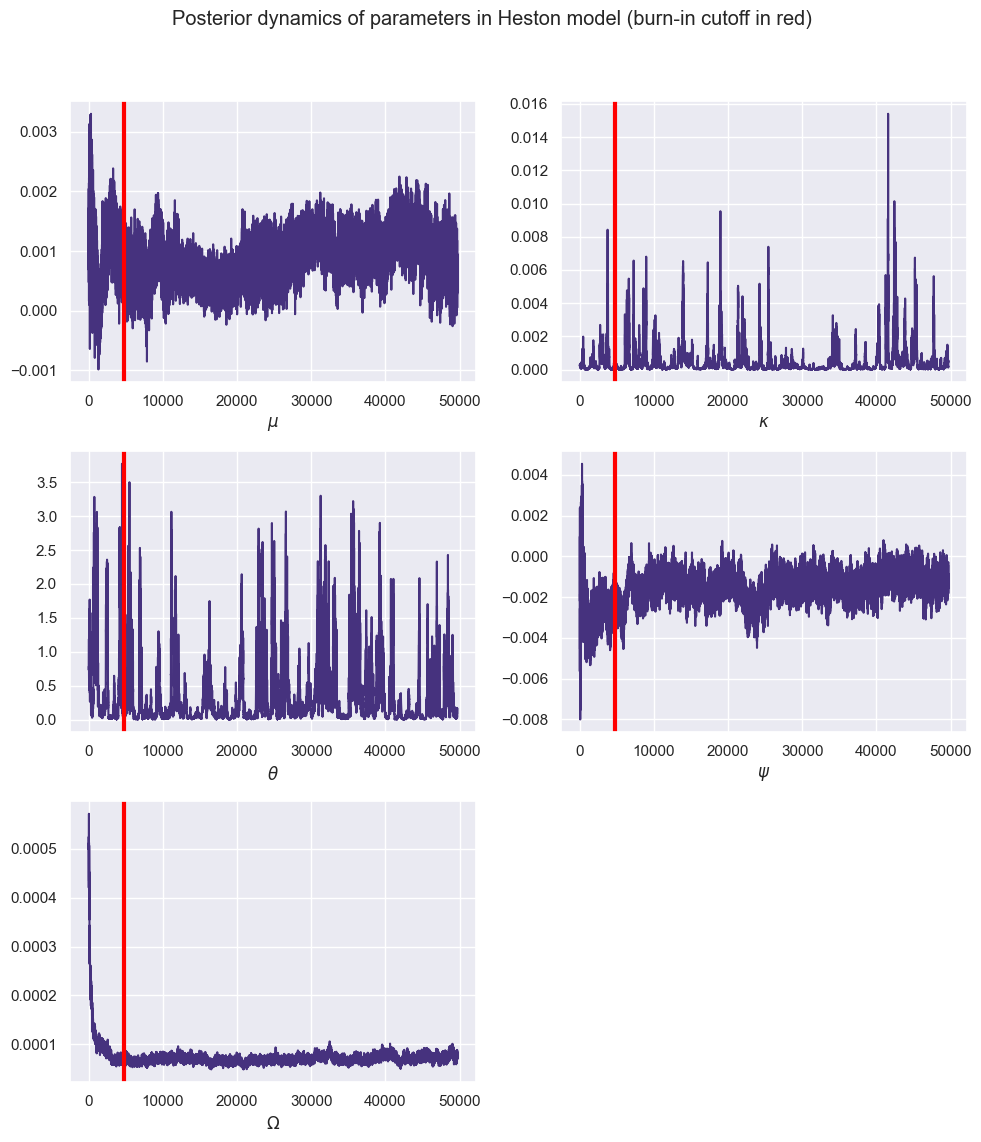

In [7]:
# ----- get the figures
# --- (a) parameters' dynamics
offset = 300
burn_in_pos = burn_in - offset
param_paths = heston_cal.all_params_array_full[offset:, :]
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
axes[0, 0].plot(param_paths[:, 0])
axes[0, 0].axvline(x=burn_in_pos, color="red", linewidth=3)
axes[0, 0].set_xlabel("$\\mu$")
axes[0, 1].plot(param_paths[:, 1])
axes[0, 1].axvline(x=burn_in_pos, color="red", linewidth=3)
axes[0, 1].set_xlabel("$\\kappa$")
axes[1, 0].plot(param_paths[:, 2])
axes[1, 0].axvline(x=burn_in_pos, color="red", linewidth=3)
axes[1, 0].set_xlabel("$\\theta$")
axes[1, 1].plot(param_paths[:, 3])
axes[1, 1].axvline(x=burn_in_pos, color="red", linewidth=3)
axes[1, 1].set_xlabel("$\\psi$")
axes[2, 0].plot(param_paths[:, 4])
axes[2, 0].axvline(x=burn_in_pos, color="red", linewidth=3)
axes[2, 0].set_xlabel("$\\Omega$")
axes[2, 1].remove()
plt.suptitle('Posterior dynamics of parameters in Heston model (burn-in cutoff in red)')
plt.subplots_adjust(wspace=None, hspace=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Also get the simulated stock price paths

Text(0, 0.5, 'Stock price')

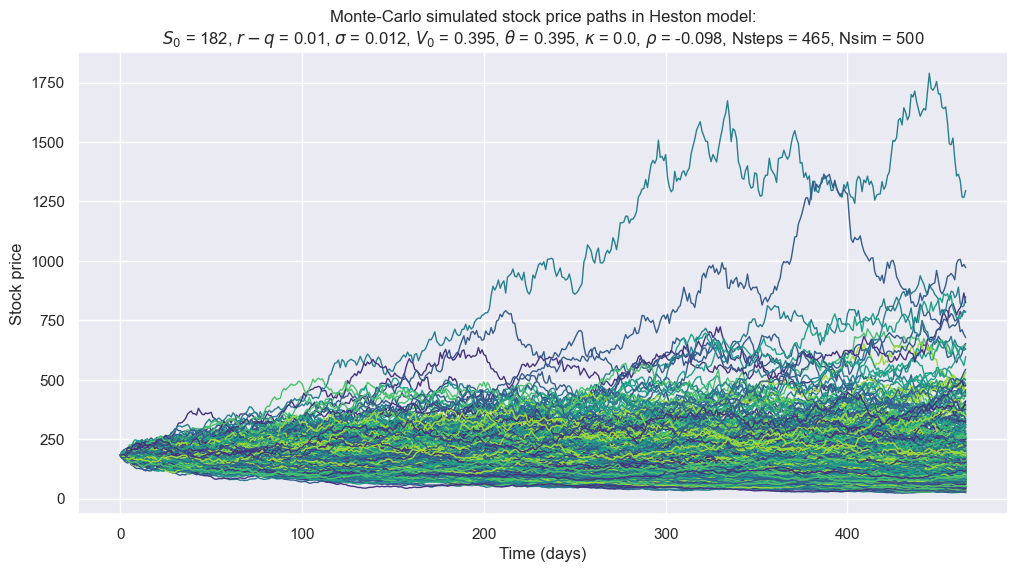

In [26]:
# --- (b) price paths
fig, ax = plt.subplots(figsize=(12, 6))
days = np.linspace(0, 1, nsteps + 1) * nsteps
bates_prices = ax.plot(days, simulated_paths.transpose(), linewidth=1)
ax.set_title("Monte-Carlo simulated stock price paths in Heston model:\n$S_0$ = {}, $r-q$ = {}, "
             "$\\sigma$ = {}, $V_0$ = {}, $\\theta$ = {}, $\\kappa$ = {}, $\\rho$ = {}, "
             "Nsteps = {}, Nsim = {}".format(*list(map(lambda x: round(x, 3), [s0, r - q, np.round(sigma, 3),
                                                                               np.round(theta, 3), np.round(theta, 3),
                                                                               np.round(kappa, 3), np.round(rho, 3),
                                                                               nsteps, nsim]))))
ax.set_xlabel('Time (days)')
ax.set_ylabel('Stock price')

And the simulated variance paths

Text(0, 0.5, 'Variance process')

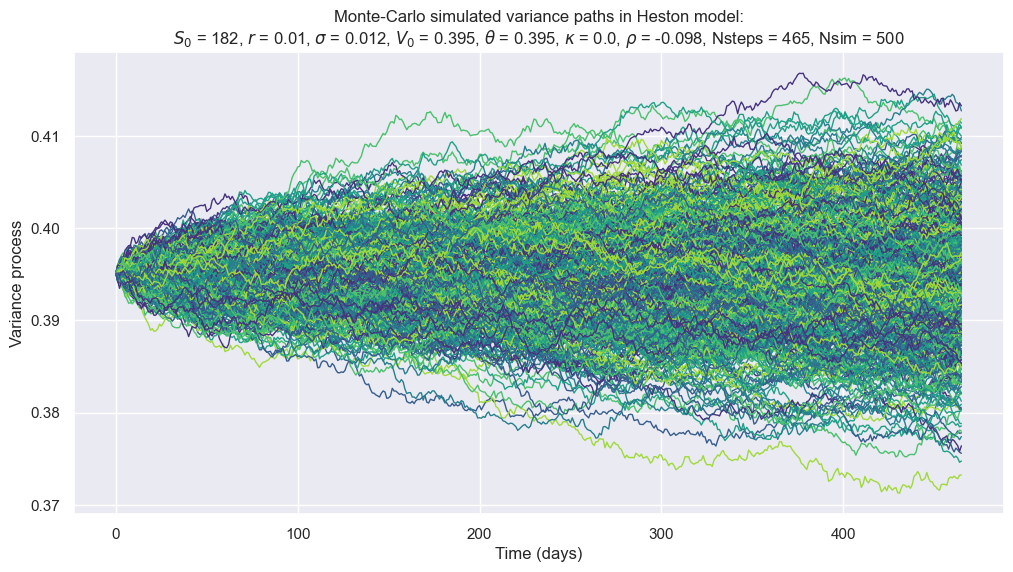

In [27]:
# --- (c) price variances
fig, ax = plt.subplots(figsize=(12, 6))
days = np.linspace(0, 1, nsteps + 1) * nsteps
bates_volas = ax.plot(days, simulated_variances.transpose(), linewidth=1)
ax.set_title("Monte-Carlo simulated variance paths in Heston model:\n$S_0$ = {}, $r$ = {}, "
             "$\\sigma$ = {}, $V_0$ = {}, $\\theta$ = {}, $\\kappa$ = {}, $\\rho$ = {}, "
             "Nsteps = {}, Nsim = {}".format(*list(map(lambda x: round(x, 3), [s0, r - q, np.round(sigma, 3),
                                                                               np.round(theta, 3), np.round(theta, 3),
                                                                               np.round(kappa, 3), np.round(rho, 3),
                                                                               nsteps, nsim]))))
ax.set_xlabel('Time (days)')
ax.set_ylabel('Variance process')